# Allstate Corporation

## First, check configuration:

In [8]:
#!/bin/bash
!echo "Configuration environment:\n"
!python --version >> config-environment.txt
!which python >> config-environment.txt
!pip --version >> config-environment.txt
!conda --version >> config-environment.txt
!which conda >> config-environment.txt

!cat config-environment.txt

# Libraries
!~/anaconda3/bin/pip freeze > requeriments.txt

Configuration environment:

Python 3.7.1
/home/campos/anaconda3/bin/python
pip 18.1 from /home/campos/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
conda 4.5.12
/home/campos/anaconda3/bin/conda


In [9]:
!rm config-environment.txt

## Imports

In [61]:
# data analysis and data wrangling
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Other
from sklearn.preprocessing import LabelEncoder
import gc # clear RAM
import warnings
import time

## Format cell

In [11]:
# guarantees visualization inside the jupyter
%matplotlib inline 

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load dataset

In [12]:
# load data in dataset
df_train = pd.read_csv("~/projetos/challenges/kaggle/allstate-claims-severity/data_base/train.csv",
                       encoding='utf-8')
df_test = pd.read_csv("~/projetos/challenges/kaggle/allstate-claims-severity/data_base/test.csv",
                      encoding='utf-8')

## Merge Data Sets

Merged the training and test sets temporarily.

In [13]:
# merge datasets
frames = [df_train, df_test]
data = pd.concat(frames)
print("The merge datasets train and test:\n{} rows\n{} columns".format(data.shape[0], data.shape[1]))

The merge datasets train and test:
313864 rows
132 columns


## Data analysis 

#### Conjuntos de dados e entradas
O conjunto de dados contém 2 arquivos .csv com informações necessárias para fazer uma previsão.
Eles são:<br/>
1. Variáveis em train.csv e test.csv: 
 - **id:** o id de um par de perguntas do conjunto de treinamento 
 - **cat1 até cat116:** variáveis de categoria (o intervalo de valores não é fornecido, nem os nomes das colunas). 
 - **cont1 até cont14:** variáveis contínuas (o intervalo de valores não é fornecido, nem os nomes das colunas).
 - **loss:** o valor que a empresa tem que pagar por uma determinada reivindicação. Esta é a variável de destino. 
 
 
 OBS: Em test.csv, a perda não está presente, já que vamos prever isso.

In [14]:
# Size and types of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313864 entries, 0 to 125545
Columns: 132 entries, cat1 to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 318.5+ MB


Dentro do _data_ há 3 tipos de dados:<br/>
- float64(15) = continuos_feature + loss
- int64(1) = id
- object(116) = categorical_feature


In [15]:
data.head()

cat1 cat10 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108  \
0    A     A      B      G      A      A      I      E      G      J      G   
1    A     B      L      F      A      A      E      E      I      K      K   
2    A     B      L      O      A      B      E      F      H      F      A   
3    B     A      I      D      A      A      E      E      I      K      K   
4    A     B      F      J      A      A      D      E      K      G      B   

  cat109 cat11 cat110 cat111 cat112 cat113 cat114 cat115 cat116 cat12 cat13  \
0     BU     B     BC      C     AS      S      A      O     LB     A     A   
1     BI     A     CQ      A     AV     BM      A      O     DP     A     A   
2     AB     B     DK      A      C     AF      A      I     GK     B     B   
3     BI     A     CS      C      N     AE      A      O     DJ     A     A   
4      H     A      C      C      Y     BM      A      K     CK     B     A   

  cat14 cat15 cat16 cat17 cat18 cat19 cat2 cat20 cat21 cat22 cat23 cat24  \
0     A     A     A     A     A     A    B     A     A     A     B     A   
1     A     A     A     A     A     A    B     A     A     A     A     A   
2     A     A     A     A     A     A    B     A     A     A     A     A   
3     A     A     A     A     A     A    B     A     A     A     B     A   
4     A     A     A     A     A     A    B     A     A     A     B     A   

  cat25 cat26 cat27 cat28 cat29 cat3 cat30 cat31 cat32 cat33 cat34 cat35  \
0     A     A     A     A     A    A     A     A     A     A     A     A   
1     A     A     A     A     A    A     A     A     A     A     A     A   
2     A     A     A     A     A    A     A     A     A     A     A     A   
3     A     A     A     A     A    A     A     A     A     A     A     A   
4     A     A     A     A     A    A     A     A     A     A     A     A   

  cat36 cat37 cat38 cat39 cat4 cat40 cat41 cat42 cat43 cat44 cat45 cat46  \
0     A     A     A     A    B     A     A     A     A     A     A     A   
1     A     A     A     A    A     A     A     A     A     A     A     A   
2     B     A     A     A    A     A     A     A     A     A     A     A   
3     A     A     A     A    B     A     A     A     A     A     A     A   
4     A     A     A     A    B     A     A     A     A     A     A     A   

  cat47 cat48 cat49 cat5 cat50 cat51 cat52 cat53 cat54 cat55 cat56 cat57  \
0     A     A     A    A     A     A     A     A     A     A     A     A   
1     A     A     A    A     A     A     A     A     A     A     A     A   
2     A     A     A    B     A     A     A     A     A     A     A     A   
3     A     A     A    A     A     A     A     A     A     A     A     A   
4     A     A     A    A     A     A     A     A     A     A     A     A   

  cat58 cat59 cat6 cat60 cat61 cat62 cat63 cat64 cat65 cat66 cat67 cat68  \
0     A     A    A     A     A     A     A     A     A     A     A     A   
1     A     A    A     A     A     A     A     A     A     A     A     A   
2     A     A    A     A     A     A     A     A     A     A     A     A   
3     A     A    A     A     A     A     A     A     A     A     A     A   
4     A     A    A     A     A     A     A     A     A     A     A     A   

  cat69 cat7 cat70 cat71 cat72 cat73 cat74 cat75 cat76 cat77 cat78 cat79 cat8  \
0     A    A     A     A     A     A     A     B     A     D     B     B    A   
1     A    A     A     A     A     A     A     A     A     D     B     B    A   
2     A    A     A     A     A     A     A     A     A     D     B     B    A   
3     A    A     A     A     A     B     A     A     A     D     B     B    A   
4     A    A     A     A     B     A     A     A     A     D     B     D    A   

  cat80 cat81 cat82 cat83 cat84 cat85 cat86 cat87 cat88 cat89 cat9 cat90  \
0     D     D     B     D     C     B     D     B     A     A    B     A   
1     D     D     A     B     C     B     D     B     A     A    B     A   
2     B     D     B     D     C     B     B     B   

In [16]:
# describing statistics of categorical variables
data.describe(include = ['object'])

cat1   cat10  cat100  cat101  cat102  cat103  cat104  cat105  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2      15      19       9      14      17      20   
top          A       A       F       A       A       A       E       E   
freq    235646  267157   71817  177924  295386  206019   71557  127477   

        cat106  cat107  cat108  cat109   cat11  cat110  cat111  cat112  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique      18      20      11      85       2     134      17      51   
top          G       F       B      BI       A      CL       A       E   
freq     78180   78863  108731  255052  280656   42097  214421   42109   

        cat113  cat114  cat115  cat116   cat12   cat13   cat14   cat15  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique      63      19      23     349       2       2       2       2   
top         BM       A       K      HK       A       A       A       A   
freq     43756  219707   73027   35076  266602  281455  309995  313807   

         cat16   cat17   cat18   cat19    cat2   cat20   cat21   cat22  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    303105  311675  312233  310886  177924  313548  313196  313794   

         cat23   cat24   cat25   cat26   cat27   cat28   cat29    cat3  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    262717  303407  283374  295196  280489  301689  307686  296745   

         cat30   cat31   cat32   cat33   cat34   cat35   cat36   cat37  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    308007  305041  311830  312275  312918  313522  260348  276241   

         cat38   cat39    cat4   cat40   cat41   cat42   cat43   cat44  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    282097  305563  214421  300200  302017  310966  306921  287701   

         cat45   cat46   cat47   cat48   cat49    cat5   cat50   cat51  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    306638  312408  312672  313415  298622  206019  229499  311832   

         cat52   cat53   cat54   cat55   cat56   cat57   cat58   cat59  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    299266  288337  306339  313622  313571  308856  313472  313358   

          cat6   cat60   cat61   cat62   cat63   cat64   cat65   cat66  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    219707  313161  312620  313798  313740  313795  310077  299912   

         cat67   cat68   cat69    cat7   cat70   cat71   cat72   cat73  \
count   313864  313864  313864  313864  313864  313864  313864  313864   
unique       2       2       2       2       2       2       2       3   
top          A       A       A       A       A       A       A       A   
freq

In [17]:
# Types data in collumns
print(data.dtypes)

cat1       object
cat10      object
cat100     object
cat101     object
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat11      object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat2       object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat3       object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat4       object
cat40      object
cat41      object
cat42      object
cat43      object
cat44     

## Data Cleanning

- Check missing values
- Sepearte the categorical and continous features
- Check unique values
- Transformations
- Variable id for submission

In [18]:
# Check each columns by values missing
missing = data.isnull().any()

for i in missing:
    if i == True:
        print ("Column {} contains values missing !".format(i))

print("There are now {} missing values in the loss column".format(data['loss'].isnull().sum()))

Column True contains values missing !
There are now 125546 missing values in the loss column


In [19]:
# Sepearte the categorical and continous features
continuous_features = []
categorical_features = []

for i in data.columns:
    if 'cont' in i:
        continuous_features.append(i)
    elif 'cat' in i:
        categorical_features.append(i)

#continuous_features.remove('loss')


print("Continuos Features: \n{} \n".format(continuous_features))
print("Categorical Features : \n{}\n".format(categorical_features))

Continuos Features: 
['cont1', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9'] 

Categorical Features : 
['cat1', 'cat10', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat11', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat2', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat3', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat4', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat5', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat6', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat7', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 

In [20]:
# We’ll explore the unique values in the feature columns.
cat_uniques = []
for cat in categorical_features:
    cat_uniques.append(len(df_train[cat].unique()))
    
unique_values = pd.DataFrame({'cat_name': categorical_features, 'unique_values': cat_uniques})
print(unique_values)

    cat_name  unique_values
0       cat1              2
1      cat10              2
2     cat100             15
3     cat101             19
4     cat102              9
5     cat103             13
6     cat104             17
7     cat105             20
8     cat106             17
9     cat107             20
10    cat108             11
11    cat109             84
12     cat11              2
13    cat110            131
14    cat111             16
15    cat112             51
16    cat113             61
17    cat114             19
18    cat115             23
19    cat116            326
20     cat12              2
21     cat13              2
22     cat14              2
23     cat15              2
24     cat16              2
25     cat17              2
26     cat18              2
27     cat19              2
28      cat2              2
29     cat20              2
30     cat21              2
31     cat22              2
32     cat23              2
33     cat24              2
34     cat25        

In [21]:
print(unique_values.describe())

       unique_values
count     116.000000
mean        9.818966
std        33.666807
min         2.000000
25%         2.000000
50%         2.000000
75%         4.000000
max       326.000000


In [22]:
# log transform help data to make gaussian distribuition
log_loss = np.log(data['loss'])

# default
default_loss = data['loss']

### Convert categorical string values to numeric values

There are 116 categories with non alphanumeric values, most of the machine learning algorithms doesn't work with alpha numeric values. So, lets convert it into numeric values

In [23]:
# data df
# first, we convert the categorical variables into numbers
data_copy = data.copy()
categoricals = data_copy.loc[:, categorical_features]
for cat_feat in categoricals.columns:
    categoricals[cat_feat] = pd.factorize(categoricals[cat_feat], sort=True)[0]

In [24]:
categoricals.head()

cat1  cat10  cat100  cat101  cat102  cat103  cat104  cat105  cat106  \
0     0      0       1       6       0       0       8       4       6   
1     0      1      11       5       0       0       4       4       8   
2     0      1      11      14       0       1       4       5       7   
3     1      0       8       3       0       0       4       4       8   
4     0      1       5       9       0       0       3       4      10   

   cat107  cat108  cat109  cat11  cat110  cat111  cat112  cat113  cat114  \
0       9       6      46      1      28       2      19      57       0   
1      10      10      34      0      67       0      22      39       0   
2       5       0       2      1      87       0      28       6       0   
3      10      10      34      0      69       2      39       5       0   
4       6       1      67      0      51       2      50      39       0   

   cat115  cat116  cat12  cat13  cat14  cat15  cat16  cat17  cat18  cat19  \
0      14     288      0      0      0      0      0      0      0      0   
1      14      94      0      0      0      0      0      0      0      0   
2       8     167      1      1      0      0      0      0      0      0   
3      14      88      0      0      0      0      0      0      0      0   
4      10      63      1      0      0      0      0      0      0      0   

   cat2  cat20  cat21  cat22  cat23  cat24  cat25  cat26  cat27  cat28  cat29  \
0     1      0      0      0      1      0      0      0      0      0      0   
1     1      0      0      0      0      0      0      0      0      0      0   
2     1      0      0      0      0      0      0      0      0      0      0   
3     1      0      0      0      1      0      0      0      0      0      0   
4     1      0      0      0      1      0      0      0      0      0      0   

   cat3  cat30  cat31  cat32  cat33  cat34  cat35  cat36  cat37  cat38  cat39  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      1      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat4  cat40  cat41  cat42  cat43  cat44  cat45  cat46  cat47  cat48  cat49  \
0     1      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      0      0      0      0   
3     1      0      0      0      0      0      0      0      0      0      0   
4     1      0      0      0      0      0      0      0      0      0      0   

   cat5  cat50  cat51  cat52  cat53  cat54  cat55  cat56  cat57  cat58  cat59  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     1      0      0      0      0      0      0      0      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat6  cat60  cat61  cat62  cat63  cat64  cat65  cat66  cat67  cat68  cat69  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      0      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat7  cat70  cat71  cat72  cat73  cat74  cat75  cat76  cat77  cat78  cat79  \
0     0      0      0      0      0      0      1      0      3      1      1   
1     0      0      0      0      0      

In [25]:
# test df
# first, we convert the categorical variables into numbers
data_copy_test = test.copy()
categoricals_test = data_copy.loc[:, categorical_features]
for cat_feat in categoricals.columns:
    categoricals_test[cat_feat] = pd.factorize(categoricals_test[cat_feat], sort=True)[0]

In [26]:
data_copy_test.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    A    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    B    A    A    A    A    B     A     A     A     A     A   
2    A    B    A    B    B    A    B    A    B     B     A     B     B     B   
3    A    A    A    A    B    A    A    A    A     A     A     A     A     A   
4    B    A    A    A    A    B    A    A    A     A     A     A     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     B     B     A     A   
2     A     A     A     A     A     A     A     A     B     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37 cat38  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     B     A     B   
3     A     A     A     A     A     A     A     A     A     B     A     B   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49 cat50  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     B     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     B     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     B   

  cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61 cat62  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     B     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73 cat74  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     B     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     B     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85 cat86  \
0     A     A     D     B     B     D     D     B     B     C     B     D   
1     B     A     D     B     B     D     D     B     B     C     B     B   
2     A     B     D     B     B     B     B     B     D     C     B     B   
3     A     A     D     B     D     B     D     B     B     A     B     D   
4     A     A     D     B     B     D     D     B     B     C     B     B   

  cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97 cat98  \
0     B     A     A     A     A     A     D     C     C     E     C     D   
1     B     A     A     A     A     A     D     D     D     E     A     A   
2     B     A     B     A     A     A     D     D     C     E     E     A   
3     D     A     A     A     G     H     D     D     C     E     E     D   
4     B     A     A     A     A     A     D     B     D     E     A     A   

  cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108 cat109  \
0     T      H      G      A      A      G      E      I      L      K     BI   
1     P      B      D      A      A      G      G      G      F      B     BI   
2     D      G      Q      A      D  

## Data Preprocessing


In [27]:
for cat_feat in categorical_features:
    data_copy[cat_feat] = pd.factorize(data_copy[cat_feat], sort=True)[0]

In [28]:
data_copy.head()

cat1  cat10  cat100  cat101  cat102  cat103  cat104  cat105  cat106  \
0     0      0       1       6       0       0       8       4       6   
1     0      1      11       5       0       0       4       4       8   
2     0      1      11      14       0       1       4       5       7   
3     1      0       8       3       0       0       4       4       8   
4     0      1       5       9       0       0       3       4      10   

   cat107  cat108  cat109  cat11  cat110  cat111  cat112  cat113  cat114  \
0       9       6      46      1      28       2      19      57       0   
1      10      10      34      0      67       0      22      39       0   
2       5       0       2      1      87       0      28       6       0   
3      10      10      34      0      69       2      39       5       0   
4       6       1      67      0      51       2      50      39       0   

   cat115  cat116  cat12  cat13  cat14  cat15  cat16  cat17  cat18  cat19  \
0      14     288      0      0      0      0      0      0      0      0   
1      14      94      0      0      0      0      0      0      0      0   
2       8     167      1      1      0      0      0      0      0      0   
3      14      88      0      0      0      0      0      0      0      0   
4      10      63      1      0      0      0      0      0      0      0   

   cat2  cat20  cat21  cat22  cat23  cat24  cat25  cat26  cat27  cat28  cat29  \
0     1      0      0      0      1      0      0      0      0      0      0   
1     1      0      0      0      0      0      0      0      0      0      0   
2     1      0      0      0      0      0      0      0      0      0      0   
3     1      0      0      0      1      0      0      0      0      0      0   
4     1      0      0      0      1      0      0      0      0      0      0   

   cat3  cat30  cat31  cat32  cat33  cat34  cat35  cat36  cat37  cat38  cat39  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      1      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat4  cat40  cat41  cat42  cat43  cat44  cat45  cat46  cat47  cat48  cat49  \
0     1      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      0      0      0      0   
3     1      0      0      0      0      0      0      0      0      0      0   
4     1      0      0      0      0      0      0      0      0      0      0   

   cat5  cat50  cat51  cat52  cat53  cat54  cat55  cat56  cat57  cat58  cat59  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     1      0      0      0      0      0      0      0      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat6  cat60  cat61  cat62  cat63  cat64  cat65  cat66  cat67  cat68  cat69  \
0     0      0      0      0      0      0      0      0      0      0      0   
1     0      0      0      0      0      0      0      0      0      0      0   
2     0      0      0      0      0      0      0      0      0      0      0   
3     0      0      0      0      0      0      0      0      0      0      0   
4     0      0      0      0      0      0      0      0      0      0      0   

   cat7  cat70  cat71  cat72  cat73  cat74  cat75  cat76  cat77  cat78  cat79  \
0     0      0      0      0      0      0      1      0      3      1      1   
1     0      0      0      0      0      

In [29]:
for cat_feat in categorical_features:
    data_copy_test[cat_feat] = pd.factorize(data_copy_test[cat_feat], sort=True)[0]

In [30]:
data_copy_test.head()

cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10  cat11  cat12  \
0     0     1     0     0     0     0     0     0     1      0      1      0   
1     0     1     0     1     0     0     0     0     1      0      0      0   
2     0     1     0     1     1     0     1     0     1      1      0      1   
3     0     0     0     0     1     0     0     0     0      0      0      0   
4     1     0     0     0     0     1     0     0     0      0      0      0   

   cat13  cat14  cat15  cat16  cat17  cat18  cat19  cat20  cat21  cat22  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      1      1      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat23  cat24  cat25  cat26  cat27  cat28  cat29  cat30  cat31  cat32  \
0      0      0      0      0      0      0      0      0      0      0   
1      1      1      0      0      0      0      0      0      0      0   
2      1      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat33  cat34  cat35  cat36  cat37  cat38  cat39  cat40  cat41  cat42  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      1      0      1      1      0      0      0   
3      0      0      0      1      0      1      0      0      1      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat43  cat44  cat45  cat46  cat47  cat48  cat49  cat50  cat51  cat52  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      1      0      0   

   cat53  cat54  cat55  cat56  cat57  cat58  cat59  cat60  cat61  cat62  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      1      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   cat63  cat64  cat65  cat66  cat67  cat68  cat69  cat70  cat71  cat72  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      1   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      1   
4      0      0      0      0      0      0      0      0      0      0   

   cat73  cat74  cat75  cat76  cat77  cat78  cat79  cat80  cat81  cat82  \
0      0      0      0      0      3      1      1      3      3      1   
1      0      0      1      0      3      1      1      3      3      1   
2      0      0      0      1      3      1      1      1      1      1   
3      0      0      0      0      3      1      3      1      3      1   
4      0      0      0      0      3      1      1      3      3      1   

   cat83  cat84  cat85  cat86  cat87  cat88  cat89  cat90  cat91  cat92  \
0      1      2      1      3      1      0      0      0      0      0   
1      1      2      1      1      1      0      0      0      0      0   
2      3      2      1      1      1      0      1      0      0      0   
3      1      0      1      3      3      0      0      0      6 

In [31]:
np.all(np.isfinite(categoricals))

True

In [32]:
np.any(np.isnan(categoricals))

False

### Store _ids_ to later preparing submission


In [33]:
test_ids = data['id']

## Feature enginer

- Loss Variable
- Continuous feature
 - Visualize data continuos
 - Correlation data continuos
 - Matrix correlation: continuous features
- Categorical feature
 - Transform categorical feature
 - Visualize data categorical
 - Matrix correlation: categorical features

### _Loss_ target

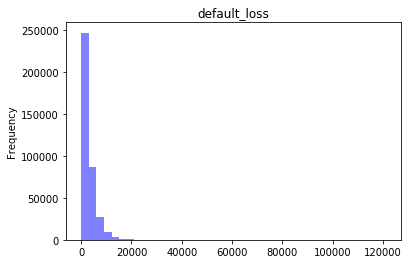

In [24]:
# Plot showing loss distribution
plt.figure()
default_loss.plot.hist(alpha=0.5, color = 'blue', bins = 40)
plt.title("default_loss")
plt.show()

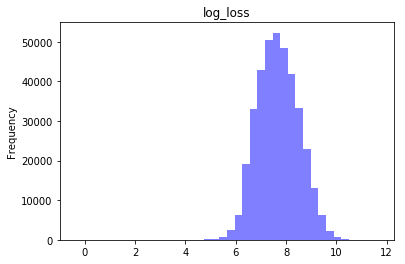

In [25]:
# Plot showing loss distribution
plt.figure()
log_loss.plot.hist(alpha=0.5, color = 'blue', bins = 40)
plt.title("log_loss")
plt.show()

It`s possible see that it is skewed to the left.

### Continuos features

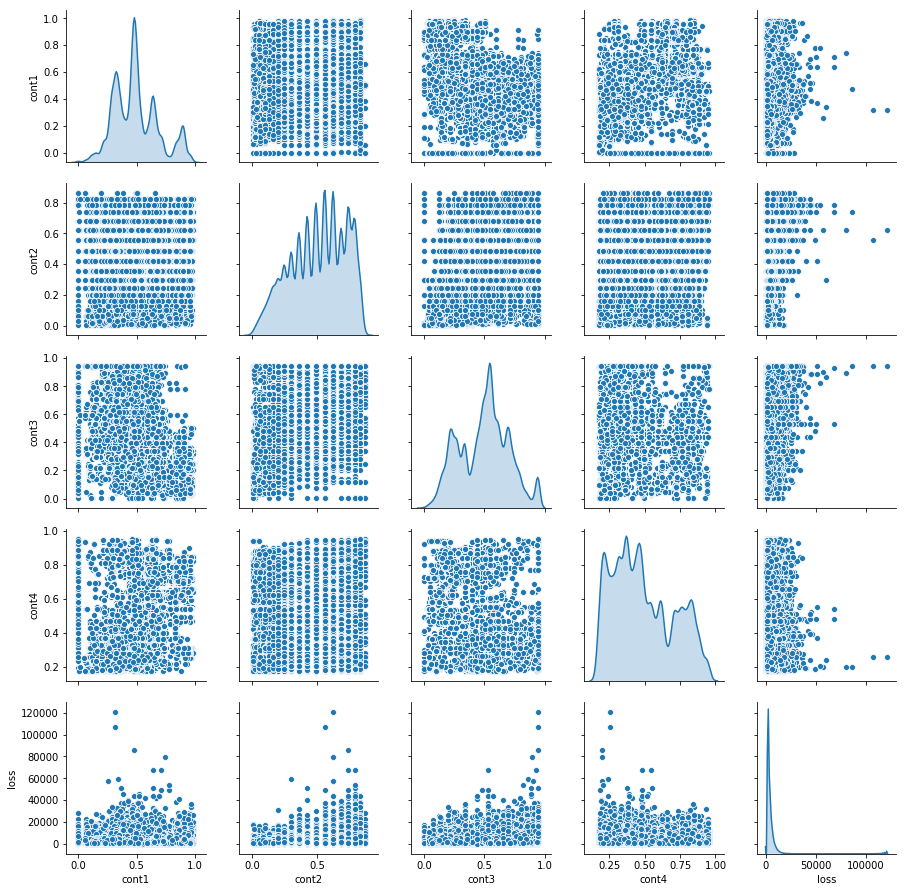

In [224]:
sns.pairplot(
    df_train[continuous_features],
    vars=['cont1','cont2','cont3','cont4','loss'],
    kind = 'scatter',
    diag_kind='kde')

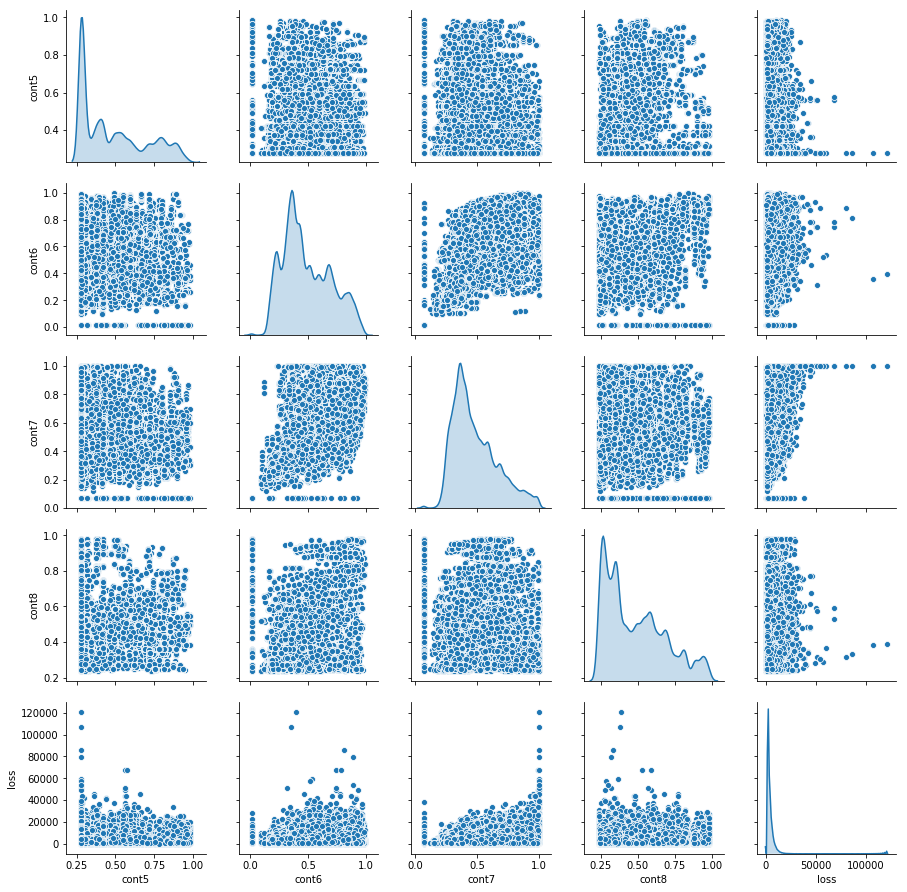

In [225]:
sns.pairplot(
    df_train[continuous_features],
    vars=['cont5','cont6','cont7','cont8','loss'],
    kind = 'scatter',
    diag_kind='kde')

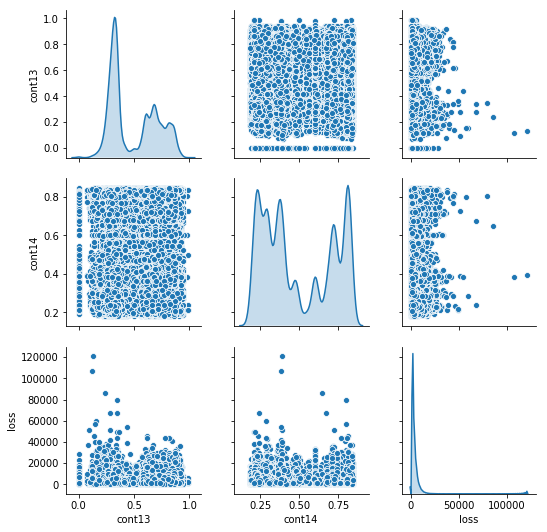

In [226]:
sns.pairplot(
    df_train[continuous_features],
    vars=['cont13','cont14','loss'],
    kind = 'scatter',
    diag_kind='kde')

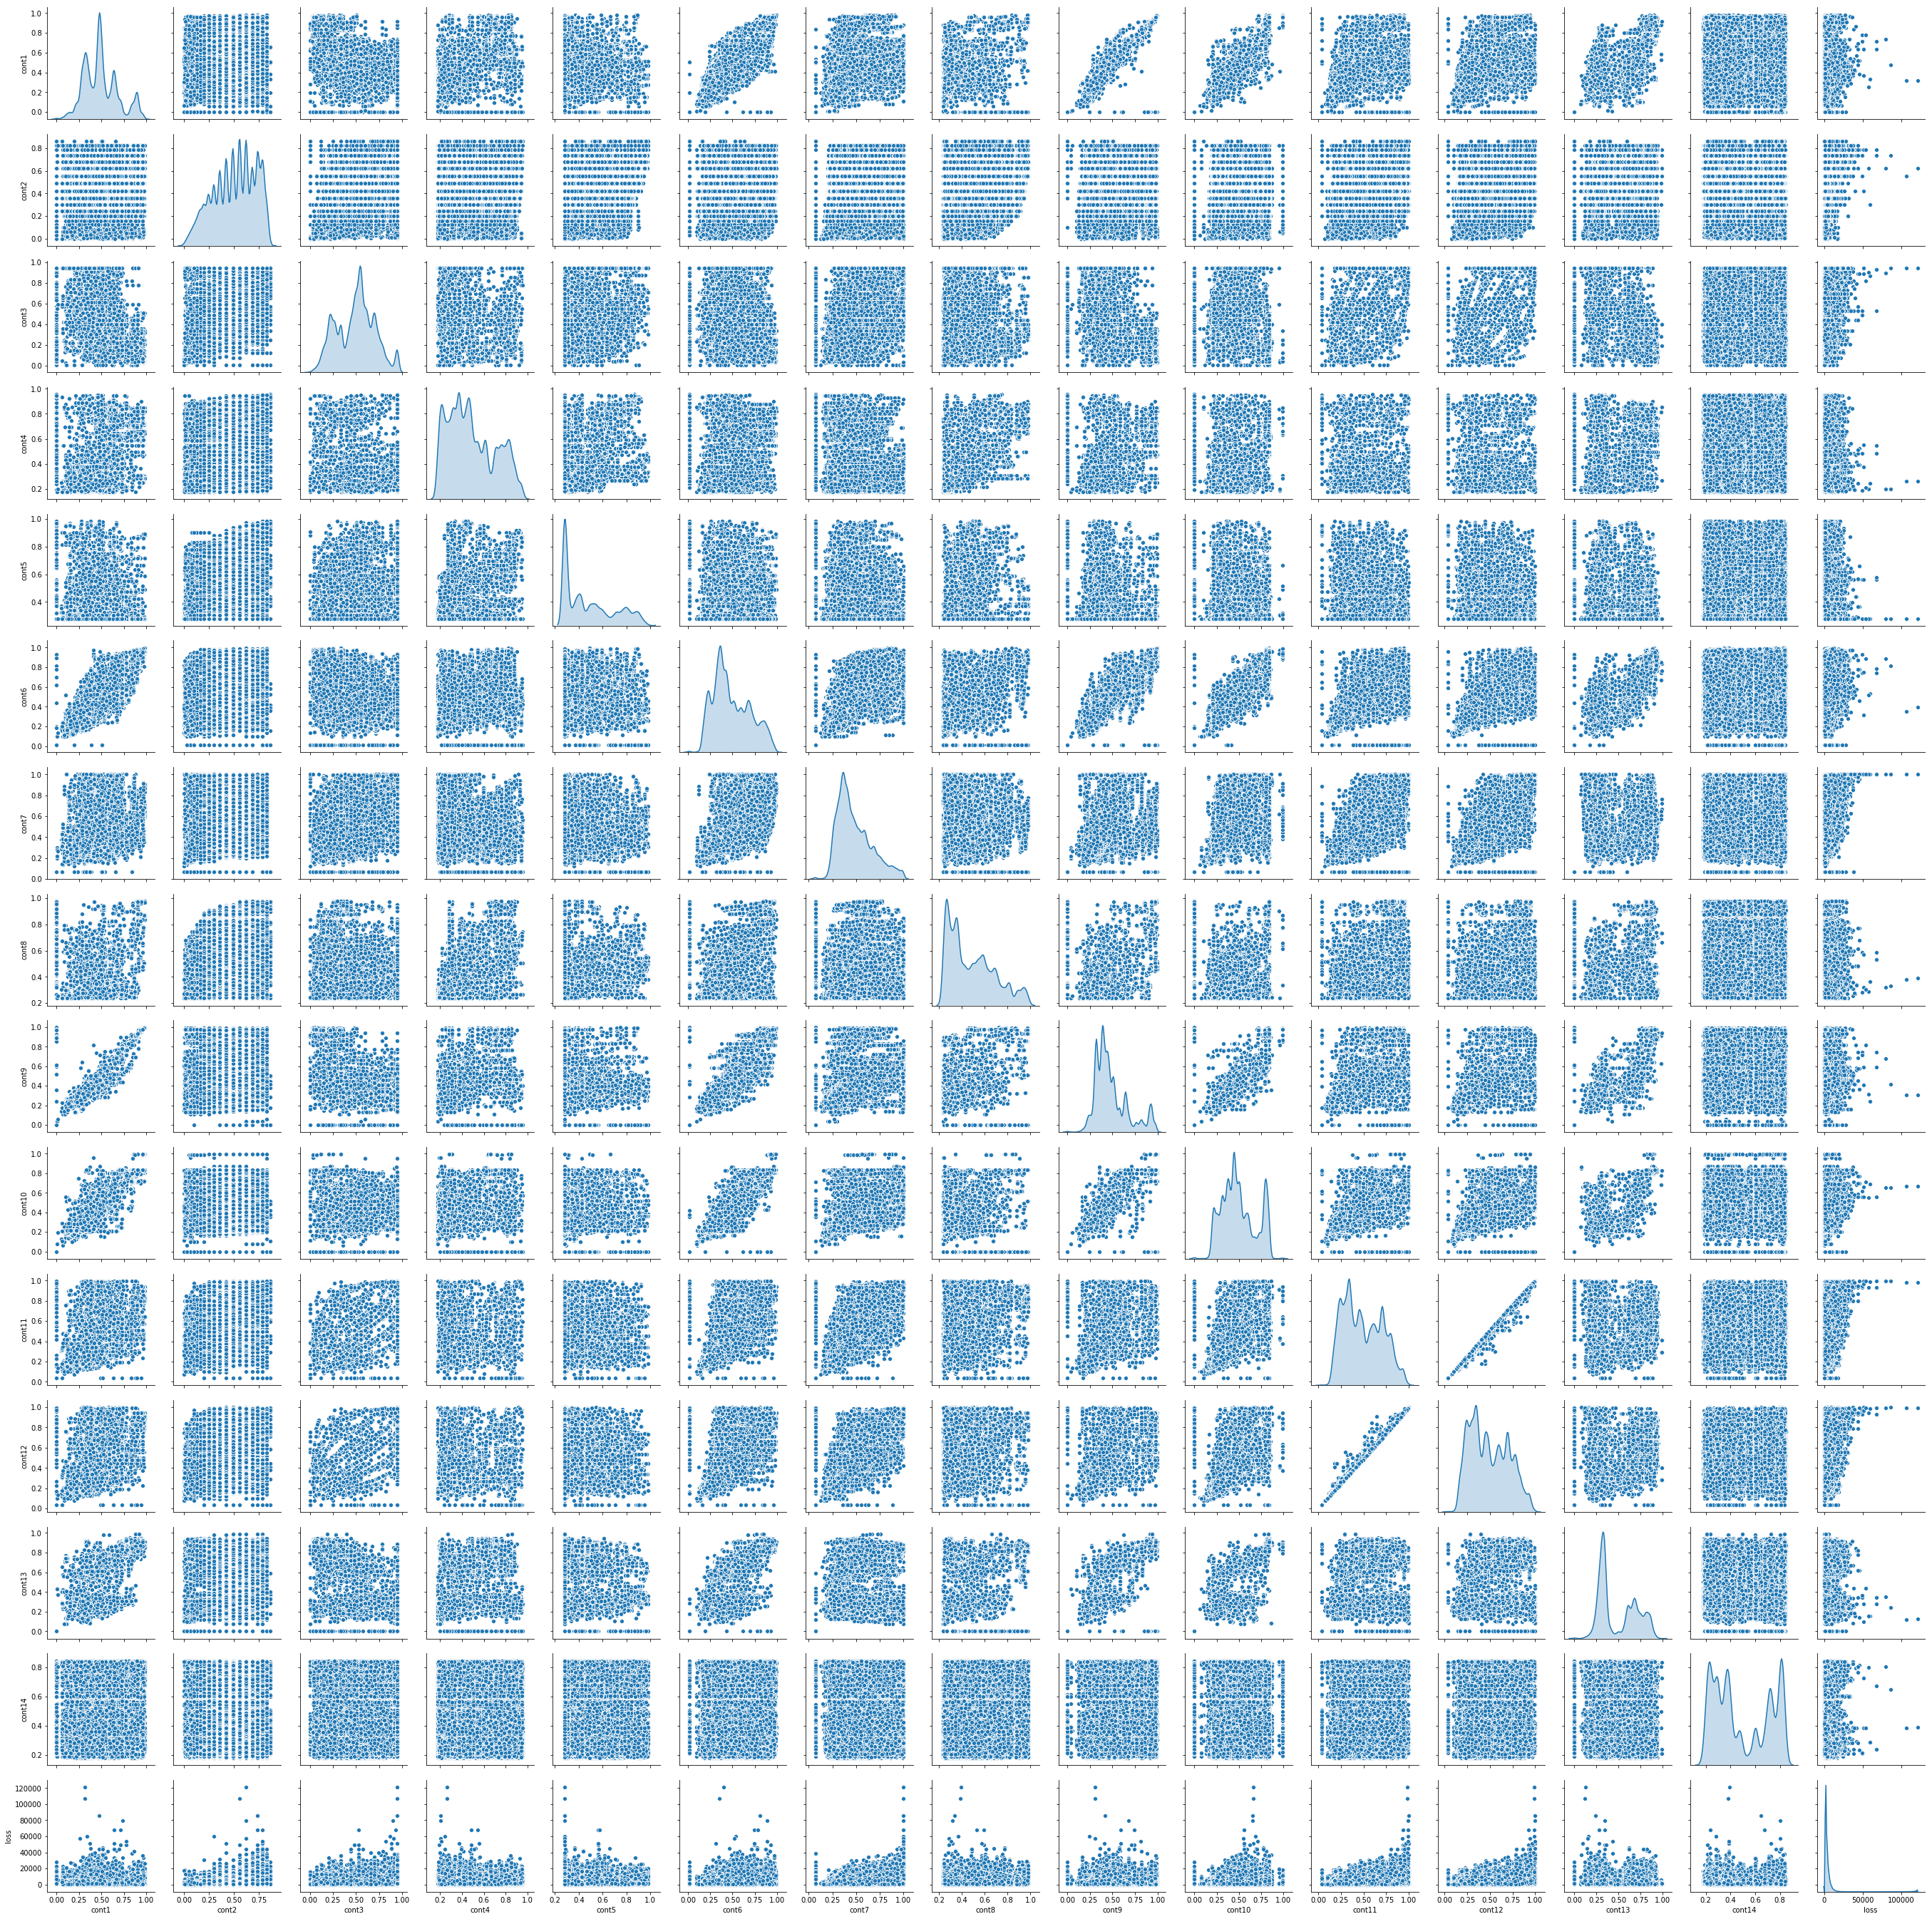

In [227]:
sns.pairplot(
    df_train[continuous_features],
    kind = 'scatter',
    diag_kind='kde')

### Matrix correlation: continuous features

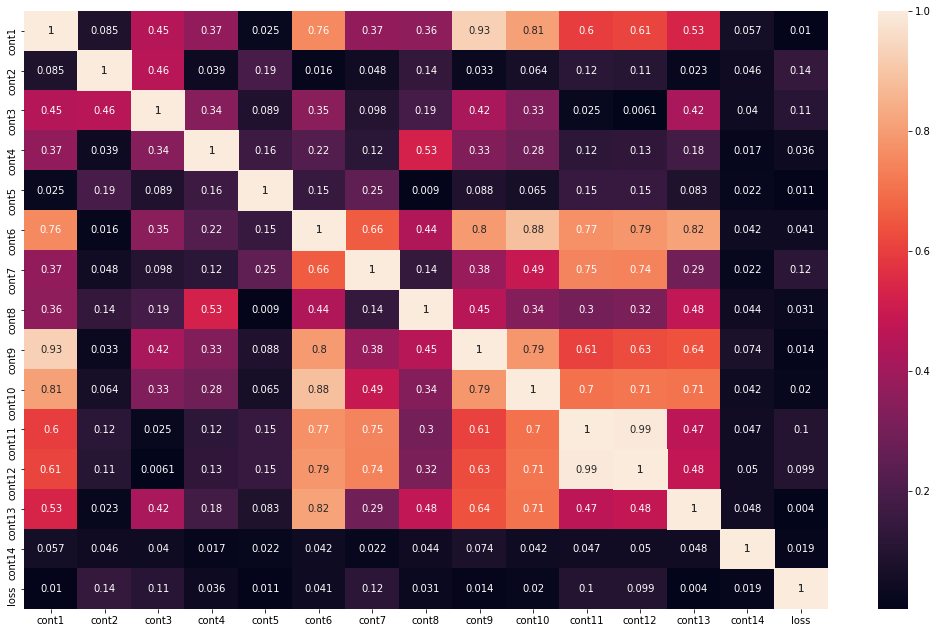

In [228]:
correlationMatrix = data[continuous_features].corr().abs()

plt.subplots(figsize=(18, 11))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix,
            mask=correlationMatrix < 1,
            cbar=False,
            linecolor='white',
            annot = True)
plt.show()

It`s possible see correlations exists between some of the continuous variables.
In this case, the correlations score between cont10 and cont11 is 0.7. 

### Categorical features

### Best correlation in categorical feature

In [229]:
corrCatMatrix = data_copy[categorical_features].corr().abs()

s = corrCatMatrix.unstack()
sortedSeries = s.sort_values(kind="quicksort",ascending=False)
best_correlation_categorical = sortedSeries[sortedSeries != 1.0][0:10]

print("Top correlated categorical feature pairs: \n")
print(best_correlation_categorical)

Top correlated categorical feature pairs: 

cat3    cat90     0.955738
cat90   cat3      0.955738
cat7    cat89     0.955504
cat89   cat7      0.955504
cat2    cat9      0.932420
cat9    cat2      0.932420
cat6    cat50     0.925731
cat50   cat6      0.925731
cat116  cat104    0.918193
cat104  cat116    0.918193
dtype: float64


## Split train and test
- Shift applied to the log transformation
- Drop the id and loss column from the training and test sets.

In [34]:
# split into training and test sets
shift = 200

# create target label
X_train = df_train[continuous_features]
y_train = np.log(df_train['loss'] + shift)

X_test = df_test[continuous_features]

In [35]:
X_train.head()

cont1   cont10    cont11    cont12    cont13    cont14     cont2  \
0  0.726300  0.83510  0.569745  0.594646  0.822493  0.714843  0.245921   
1  0.330514  0.43919  0.338312  0.366307  0.611431  0.304496  0.737068   
2  0.261841  0.32446  0.381398  0.373424  0.195709  0.774425  0.358319   
3  0.321594  0.44467  0.327915  0.321570  0.605077  0.602642  0.555782   
4  0.273204  0.21230  0.204687  0.202213  0.246011  0.432606  0.159990   

      cont3     cont4     cont5     cont6     cont7    cont8    cont9  
0  0.187583  0.789639  0.310061  0.718367  0.335060  0.30260  0.67135  
1  0.592681  0.614134  0.885834  0.438917  0.436585  0.60087  0.35127  
2  0.484196  0.236924  0.397069  0.289648  0.315545  0.27320  0.26076  
3  0.527991  0.373816  0.422268  0.440945  0.391128  0.31796  0.32128  
4  0.527991  0.473202  0.704268  0.178193  0.247408  0.24564  0.22089

In [36]:
y_train.head()

0    7.788701
1    7.302227
2    8.072495
3    7.038652
4    7.994244
Name: loss, dtype: float64

In [37]:
X_test.head()

cont1   cont10    cont11    cont12    cont13    cont14     cont2  \
0  0.321594  0.38016  0.377724  0.369858  0.704052  0.392562  0.299102   
1  0.634734  0.60401  0.689039  0.675759  0.453468  0.208045  0.620805   
2  0.290813  0.30529  0.245410  0.241676  0.258586  0.297232  0.737068   
3  0.268622  0.31480  0.348867  0.341872  0.592264  0.555955  0.681761   
4  0.553846  0.50556  0.359572  0.352251  0.301535  0.825823  0.299102   

      cont3     cont4     cont5     cont6     cont7    cont8    cont9  
0  0.246911  0.402922  0.281143  0.466591  0.317681  0.61229  0.34365  
1  0.654310  0.946616  0.836443  0.482425  0.443760  0.71330  0.51890  
2  0.711159  0.412789  0.718531  0.212308  0.325779  0.29758  0.34365  
3  0.592681  0.354893  0.397069  0.369930  0.342355  0.40028  0.33237  
4  0.263570  0.696873  0.302678  0.398862  0.391833  0.23688  0.43731

In [38]:
# check distribuition
print ("Xtrain shape:", X_train.shape[0])
print ("ytrain shape:", X_train.shape[1])
print ("Xtest shape:", X_test.shape[0])
print ("ytest shape:", X_test.shape[1])

Xtrain shape: 188318
ytrain shape: 14
Xtest shape: 125546
ytest shape: 14


## Benchmarks

We will test and execute the models:
- Linear Regression
- XGBoost
- Random Forest (Bagging)

## Linear Regression

In [29]:
# initialize Linear Regression
model_lr = LinearRegression()

In [30]:
# Train the model using the training sets
model_lr.fit(X_train, y_train)
print("---Traing Done---")

---Traing Done---


In [31]:
# Predict using the trained model 
y_prd_lr = model_lr.predict(X_test)
print("y_prd_lr:\n", +y_prd_lr)

y_prd_lr:
 [7.666939   7.7550694  7.85142807 ... 7.87669522 7.67572981 7.66427509]


In [32]:
id_test = df_test['id']

sub = pd.DataFrame()
sub['id'] = id_test
sub['loss'] = y_prd_lr
sub.to_csv('lin_regression_submission.csv', index=False, encoding='UTF8')

## Random Forest

In [47]:
# create model of the Random Forest Regressor.  
model_rf_regressor = RandomForestRegressor(n_jobs = -1, 
                            verbose = 0, 
                            random_state = 2000, 
                            n_estimators = 40,
                            max_features = 13)

In [48]:
# train Random Forest Regressor
model_rf_regressor.fit(X_train, y_train)
print("---Traing Done---")

---Traing Done---


In [49]:
# make predictions 
y_pred_rf = model_rf_regressor.predict(X_test)
print("y_pred_rf:\n", +y_pred_rf)

y_pred_rf:
 [7.49365323 8.2776985  8.00939757 ... 7.79641001 7.89455182 8.0304364 ]


In [36]:
id_test = df_test['id']

sub = pd.DataFrame()
sub['id'] = id_test
sub['loss'] = y_pred_rf
sub.to_csv('random_forest_submission.csv', index=False, encoding='UTF8')

### Manually fine-tune the Random Forest Regressor

- The traning and test it`s in function because garanted reuse.
- The predictions running in validation set in each fold.
- Garanted with array is the inverse of the log transformation about column loss.

In [55]:
def train_model(model, num_folds):
    """Train model"""
    
    print("Begin training")
    start = time.time()
    
    # declare a KFold instance
    kfold = KFold(n_splits = num_folds, random_state = 10)
    
    # number of models
    num_models = 1
    
    # array to store results after each fold
    results = []
    
    # train K-1 Random Forests using K-Folds CV
    for i, (train, val) in enumerate(kfold.split(X_train)):
        # get smaller training set and create validation set
        X_train_mini, X_val = X_train.iloc[train], X_train.iloc[val]
        y_train_mini, y_val = y_train[train], y_train[val]

        # train model
        model.fit(X_train_mini, y_train_mini)

        # make predictions 
        preds = model.predict(X_val)
        
        # absolute error
        error = mean_absolute_error(np.exp(y_val) - shift, np.exp(preds) - shift)
        print("MAE on fold {} is {}".format(i, error))
        
        # done
        results.append(error)
    
    end = time.time()
    print("Training done! Time Elapsed:", end - start)

    # get average error over k folds
    avg_error = np.mean(results)
    print(avg_error)

- The number of estimators go is tested.

In [56]:
# create instances of the Random Forest Regressor.  
rfr = RandomForestRegressor(random_state = 10, n_jobs = -1)
train_model(model = rfr, num_folds = 5)

Begin training
MAE on fold 0 is 1939.432584766646
MAE on fold 1 is 1934.4447034214004
MAE on fold 2 is 1950.7153733985147
MAE on fold 3 is 1948.612610175804
MAE on fold 4 is 1949.8975318847229
Training done! Time Elapsed: 19.028846979141235
1944.6205607294173


- Update the number of estimators to 20 to see how the model performs. 

In [57]:
rfr = RandomForestRegressor(n_estimators = 20, n_jobs = -1)
train_model(model = rfr, num_folds = 5)

Begin training
MAE on fold 0 is 1907.7600200717616
MAE on fold 1 is 1905.9257029918447
MAE on fold 2 is 1923.0275221666727
MAE on fold 3 is 1915.1211966135625
MAE on fold 4 is 1913.2968712243655
Training done! Time Elapsed: 30.584808111190796
1913.0262626136414


- Update the number of estimators to 30 to see how the model performs. 

In [60]:
rfr = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
train_model(model = rfr, num_folds = 5)

Begin training
MAE on fold 0 is 1880.704341123319
MAE on fold 1 is 1876.512480220157
MAE on fold 2 is 1893.7810234067956
MAE on fold 3 is 1891.3329392443093
MAE on fold 4 is 1885.4701531531334
Training done! Time Elapsed: 143.0702691078186
1885.560187429543


#### Analysis of Results
- The increasing the number of estimators improved score.
- The best results produced with n_estimators = 100 on fold 2.
- The problem is time process which grows in the same proportion. 

## XGBoost

In [ ]:
xgb = XGBRegressor(silent = True, seed = random_state, nthread = -1)
train_model(model = xgb, num_folds = k)

In [39]:
df_train.head()

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10 cat11 cat12 cat13 cat14  \
0    A    B    A    B    A    A    A    A    B     A     B     A     A     A   
1    A    B    A    A    A    A    A    A    B     B     A     A     A     A   
2    A    B    A    A    B    A    A    A    B     B     B     B     B     A   
3    B    B    A    B    A    A    A    A    B     A     A     A     A     A   
4    A    B    A    B    A    A    A    A    B     B     A     B     A     A   

  cat15 cat16 cat17 cat18 cat19 cat20 cat21 cat22 cat23 cat24 cat25 cat26  \
0     A     A     A     A     A     A     A     A     B     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     B     A     A     A   
4     A     A     A     A     A     A     A     A     B     A     A     A   

  cat27 cat28 cat29 cat30 cat31 cat32 cat33 cat34 cat35 cat36 cat37 cat38  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     B     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat39 cat40 cat41 cat42 cat43 cat44 cat45 cat46 cat47 cat48 cat49 cat50  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat51 cat52 cat53 cat54 cat55 cat56 cat57 cat58 cat59 cat60 cat61 cat62  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     A     A   
4     A     A     A     A     A     A     A     A     A     A     A     A   

  cat63 cat64 cat65 cat66 cat67 cat68 cat69 cat70 cat71 cat72 cat73 cat74  \
0     A     A     A     A     A     A     A     A     A     A     A     A   
1     A     A     A     A     A     A     A     A     A     A     A     A   
2     A     A     A     A     A     A     A     A     A     A     A     A   
3     A     A     A     A     A     A     A     A     A     A     B     A   
4     A     A     A     A     A     A     A     A     A     B     A     A   

  cat75 cat76 cat77 cat78 cat79 cat80 cat81 cat82 cat83 cat84 cat85 cat86  \
0     B     A     D     B     B     D     D     B     D     C     B     D   
1     A     A     D     B     B     D     D     A     B     C     B     D   
2     A     A     D     B     B     B     D     B     D     C     B     B   
3     A     A     D     B     B     D     D     D     B     C     B     D   
4     A     A     D     B     D     B     D     B     B     C     B     B   

  cat87 cat88 cat89 cat90 cat91 cat92 cat93 cat94 cat95 cat96 cat97 cat98  \
0     B     A     A     A     A     A     D     B     C     E     A     C   
1     B     A     A     A     A     A     D     D     C     E     E     D   
2     B     A     A     A     A     A     D     D     C     E     E     A   
3     B     A     A     A     A     A     D     D     C     E     E     D   
4     C     A     A     A     B     H     D     B     D     E     E     A   

  cat99 cat100 cat101 cat102 cat103 cat104 cat105 cat106 cat107 cat108 cat109  \
0     T      B      G      A      A      I      E      G      J      G     BU   
1     T      L      F      A      A      E      E      I      K      K     BI   
2     D      L      O      A      B  

In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

ID = 'id'
TARGET = 'loss'
SEED = 0



train = pd.read_csv('~/projetos/challenges/kaggle/allstate-claims-severity/data_base/train.csv')
test = pd.read_csv('~/projetos/challenges/kaggle/allstate-claims-severity/data_base/test.csv')

y_train = np.log(train[TARGET].ravel())

train.drop([ID, TARGET], axis=1, inplace=True)
test.drop([ID], axis=1, inplace=True)

print("{},{}".format(train.shape, test.shape))

(188318, 130),(125546, 130)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import time

# Used to ensure that we can replicate the results in the future 
random_state = 16

# number of folds
k = 5

In [ ]:
# create instance of the Random Forest Regressor.  
rfr = RandomForestRegressor(random_state = random_state, n_jobs = -1)

def train_model(model, num_folds):
    """Train model and average the results"""
    
    print("Begin training")
    start = time.time()
    
    # declare a KFold instance
    kfold = KFold(n_splits = num_folds, random_state = random_state)
    
    # number of models
    num_models = 1
    
    # array to store results after each fold
    results = []
    
    # train K-1 Random Forests using K-Folds CV
    for i, (train, val) in enumerate(kfold.split(X_train)):
        # get smaller training set and create validation set
        X_train_mini, X_val = X_train.iloc[train], X_train.iloc[val]
        y_train_mini, y_val = y_train[train], y_train[val]

        # train Random Forest Regressor
        model.fit(X_train_mini, y_train_mini)

        # make predictions 
        preds = model.predict(X_val)
        
        # calculate mean absolute error
        error = mean_absolute_error(np.exp(y_val) - shift, np.exp(preds) - shift)
        print("MAE on fold {} is {}".format(i, error))
        
        # store result
        results.append(error)
    
    end = time.time()
    print("Training complete! Time Elapsed:", end - start)

    # get average error over k folds
    avg_error = np.mean(results)
    print(avg_error)
    
train_model(model = rfr, num_folds = k)

In [2]:
ntrain = train.shape[0]
train_test = pd.concat((train, test)).reset_index(drop=True)

features = train.columns

cats = [feat for feat in features if 'cat' in feat]
for feat in cats:
    train_test[feat] = pd.factorize(train_test[feat], sort=True)[0]

print(train_test.head())

   cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  cat10    ...     \
0     0     1     0     1     0     0     0     0     1      0    ...      
1     0     1     0     0     0     0     0     0     1      1    ...      
2     0     1     0     0     1     0     0     0     1      1    ...      
3     1     1     0     1     0     0     0     0     1      0    ...      
4     0     1     0     1     0     0     0     0     1      1    ...      

      cont5     cont6     cont7    cont8    cont9   cont10    cont11  \
0  0.310061  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745   
1  0.885834  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312   
2  0.397069  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398   
3  0.422268  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915   
4  0.704268  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687   

     cont12    cont13    cont14  
0  0.594646  0.822493  0.714843  
1  0.366307  0.611431  0.304496  
2  0.373

In [3]:
x_train = np.array(train_test.iloc[:ntrain,:])
x_test = np.array(train_test.iloc[ntrain:,:])

print("{},{}".format(train.shape, test.shape))

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

(188318, 130),(125546, 130)


In [4]:
xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'reg:linear',
    'max_depth': 6,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'eval_metric': 'mae',
}

In [ ]:
def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y), np.exp(yhat))

res = xgb.cv(xgb_params, dtrain, seed=SEED, maximize=False)


In [1]:


best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]
print('CV-Mean: {0}+{1}'.format(cv_mean, cv_std))

NameError: name 'res' is not defined

In [ ]:
gbdt = xgb.train(xgb_params, dtrain, best_nrounds)

submission = pd.read_csv(SUBMISSION_FILE)
submission.iloc[:, 1] = np.exp(gbdt.predict(dtest))
submission.to_csv('xgb_starter_v2.sub.csv', index=None)

https://www.kaggle.com/uditsaini/all-state-eda-feature-importance
    

In [ ]:
dtrain = xgb.DMatrix(df_train[cat_columns+cont_columns], label =np.log1p(df_train['loss']))

In [ ]:
# specify parameters via map
params = {}
params['booster'] = 'gbtree'
params['objective'] = "reg:linear"
params['eval_metric'] = 'mae'
params['eta'] = 1
params['gamma'] = 0.5290
params['min_child_weight'] = 4.2922
params['colsample_bytree'] = 0.7
params['subsample'] = 0.7
params['max_depth'] = 2
params['max_delta_step'] = 0
params['silent'] = 1
params['random_state'] = 1001

In [ ]:
evallist  = [(dtrain,'train')]

In [ ]:
#not running
bst =xgb.train(params,dtrain,num_boost_round=250,evals=evallist,early_stopping_rounds=8, verbose_eval=10)

In [ ]:
gc.collect()

comparar estes 3 modelos será analisado qual tem o menor erro absoluto médio

XGBoost and MLP baseline gave the least Mean Average Error(MAE).These perform the best.

In [ ]:
# Make predictions using XGB as it gave the best estimated performance        
from xgboost import XGBRegressor
X = numpy.concatenate((X_train,X_val),axis=0)

Y = numpy.concatenate((Y_train,Y_val),axis=0)


n_estimators = 1000

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
best_model.fit(X,Y)
del X
del Y
#Read test dataset
dataset_test = pandas.read_csv("test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = numpy.column_stack(cats)

del cats

#Concatenate encoded attributes with continuous attributes
X_test = numpy.concatenate((encoded_cats,dataset_test.iloc[:,split:].values),axis=1)

del encoded_cats
del dataset_test

#Make predictions using the best model
predictions = numpy.expm1(best_model.predict(X_test))
del X_test
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))